In [1]:
import pandas as pd 
import numpy as py
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import mode

%matplotlib inline

In [2]:
aggregate = pd.read_csv('agg_match_stats_0.csv')

In [3]:
aggregate.head()

,date,game_size,match_id,match_mode,party_size,player_assists,player_dbno,player_dist_ride,player_dist_walk,player_dmg,player_kills,player_name,player_survive_time,team_id,team_placement
0,2017-11-26T20:59:40+0000,37,2U4GBNA0YmnNZYkzjkfgN4ev-hXSrak_BSey_YEG6kIuDG...,tpp,2,0,1,2870.72400,1784.847780,117,1,SnuffIes,1106.320,4,18
1,2017-11-26T20:59:40+0000,37,2U4GBNA0YmnNZYkzjkfgN4ev-hXSrak_BSey_YEG6kIuDG...,tpp,2,0,1,2938.40723,1756.079710,127,1,Ozon3r,1106.315,4,18
2,2017-11-26T20:59:40+0000,37,2U4GBNA0YmnNZYkzjkfgN4ev-hXSrak_BSey_YEG6kIuDG...,tpp,2,0,0,0.00000,224.157562,67,0,bovize,235.558,5,33
3,2017-11-26T20:59:40+0000,37,2U4GBNA0YmnNZYkzjkfgN4ev-hXSrak_BSey_YEG6kIuDG...,tpp,2,0,0,0.00000,92.935150,0,0,sbahn87,197.553,5,33
4,2017-11-26T20:59:40+0000,37,2U4GBNA0YmnNZYkzjkfgN4ev-hXSrak_BSey_YEG6kIuDG...,tpp,2,0,0,2619.07739,2510.447000,175,2,GeminiZZZ,1537.495,14,11


In [4]:
data = aggregate

In [5]:
del data['date']
del data['match_id']
del data['match_mode']
del data['team_id']

In [6]:
data = data[data.party_size == 1]

In [7]:
del data['party_size']
del data['game_size']

In [8]:
data = data.reset_index(drop=True)

In [9]:
data.head()

,player_assists,player_dbno,player_dist_ride,player_dist_walk,player_dmg,player_kills,player_name,player_survive_time,team_placement
0,0,0,0.000000,170.954788,0,0,Satch,186.999,79
1,0,0,0.000000,66.545590,0,0,osamabinlaggon,124.782,87
2,0,0,728.722656,610.168945,124,0,dengboyu76,839.161,35
3,0,0,2646.184000,1431.292000,24,0,GOGingmimi,751.716,46
4,0,0,0.000000,723.102300,100,1,AtomicBrunette,744.088,47


In [10]:
data.describe()

,player_assists,player_dbno,player_dist_ride,player_dist_walk,player_dmg,player_kills,player_survive_time,team_placement
count,2.883170e+06,2883170.0,2.883170e+06,2.883170e+06,2.883170e+06,2.883170e+06,2.883170e+06,2.883170e+06
mean,6.159089e-02,0.0,8.819219e+02,1.159026e+03,1.125187e+02,8.973103e-01,3.097825e+05,4.782749e+01
std,2.539299e-01,0.0,1.837711e+03,4.886952e+03,1.624485e+02,1.567658e+00,1.402529e+08,2.735663e+01
min,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,0.000000e+00,0.0,0.000000e+00,1.511720e+02,0.000000e+00,0.000000e+00,2.072490e+02,2.400000e+01
50%,0.000000e+00,0.0,0.000000e+00,6.884471e+02,6.800000e+01,0.000000e+00,5.779840e+02,4.800000e+01
75%,0.000000e+00,0.0,1.104039e+03,1.818462e+03,1.570000e+02,1.000000e+00,1.178320e+03,7.100000e+01
max,6.000000e+00,0.0,4.046806e+05,1.188375e+06,6.343000e+03,6.400000e+01,6.364788e+10,1.000000e+02


In [11]:
del data['player_dbno']

In [12]:
data = data[data.player_kills < 20] #Eliminating cheaters

In [13]:
test = data[100000:120000]

In [14]:
train = data[0:100000]

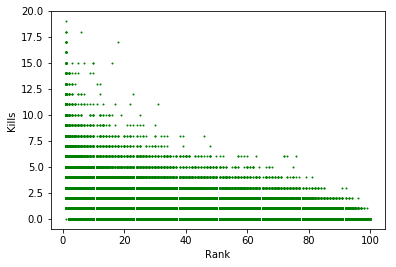

In [134]:
fig1 = train.plot.scatter(x='team_placement', y='player_kills', color='green', s=1)
fig1.set_xlabel("Rank")
fig1.set_ylabel("Kills")
fig1.grid(color='black', axis=['x', 'y'], linestyle='solid')

In [16]:
groups = [("Q5", 100,80), ("Q4", 79, 60), ("Q3", 59,40),("Q2", 40,20),("Q1", 19,10),("T10", 10,6),("T5", 5,2),("Winner", 1,0)]
print("    Kills\t\t   Assists\t\t\t   Damage\n    average\tmedian\t  average\t\tmedian\t   average\tmedian\t   ")
for (name, lte, gt) in groups:
    mean_kills = train[(train['team_placement'] > gt) & (train['team_placement'] <= lte)]['player_kills'].mean()
    median_kills = train[(train['team_placement'] > gt) & (train['team_placement'] <= lte)]['player_kills'].median()
    mean_assists = train[(train['team_placement'] > gt) & (train['team_placement'] <= lte)]['player_assists'].mean()
    median_assists = train[(train['team_placement'] > gt) & (train['team_placement'] <= lte)]['player_assists'].median()
    mean_dmg = train[(train['team_placement'] > gt) & (train['team_placement'] <= lte)]['player_dmg'].mean()
    median_dmg = train[(train['team_placement'] > gt) & (train['team_placement'] <= lte)]['player_dmg'].median()
    print(name+": "+str(mean_kills)[0:5]+"  \t"+str(median_kills)+"  \t"+str(mean_assists)+"  \t"+str(median_assists)+"\t   "+str(mean_dmg)[0:5]+"  \t"+str(median_dmg))

    Kills		   Assists			   Damage
    average	median	  average		median	   average	median	   
Q5: 0.104  	0.0  	0.038551951104842504  	0.0	   25.94  	0.0
Q4: 0.360  	0.0  	0.0363725012189176  	0.0	   55.56  	27.0
Q3: 0.638  	0.0  	0.04233134729963483  	0.0	   85.49  	67.0
Q2: 1.003  	1.0  	0.06810672190166198  	0.0	   126.0  	100.0
Q1: 1.463  	1.0  	0.09092820351098496  	0.0	   175.0  	134.0
T10: 1.943  	2.0  	0.12057394121731081  	0.0	   225.7  	191.0
T5: 2.736  	2.0  	0.16723024900092223  	0.0	   308.2  	271.0
Winner: 6.461  	6.0  	0.241635687732342  	0.0	   664.9  	616.0


Text(0,0.5,'Count')

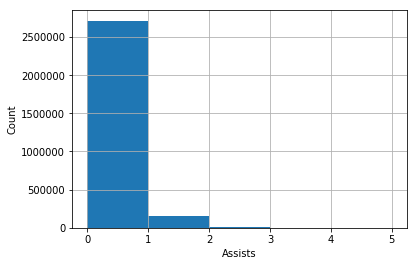

In [17]:
fig2 = data["player_assists"].hist(bins= 5, range=[0,5])
fig2.set_xlabel("Assists")
fig2.set_ylabel("Count")

Text(0,0.5,'Damage to Other Players')

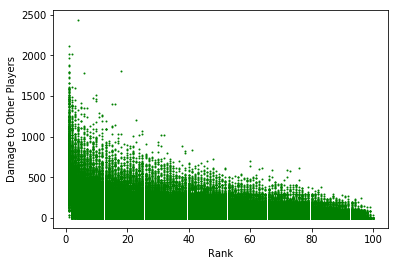

In [18]:
fig4 = train.plot.scatter(x='team_placement', y='player_dmg', color='green', s=1)
fig4.set_xlabel("Rank")
fig4.set_ylabel("Damage to Other Players")

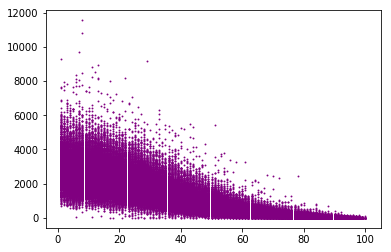

In [19]:
train1 = train[train.player_dist_walk < 15000]
fig5 = plt.scatter(x=train1['team_placement'], y=train1['player_dist_walk'], s=0.8, color='purple')
#fig5.set_xlabel("Rank")
#fig5.set_ylabel("Damage to Other")

Text(0,0.5,'Distance Walked')

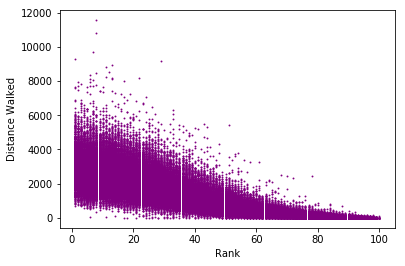

In [20]:
fig4 = train1.plot.scatter(x='team_placement', y='player_dist_walk', s=0.8, color='purple')
fig4.set_xlabel("Rank")
fig4.set_ylabel("Distance Walked")

Text(0,0.5,'Distance Ride')

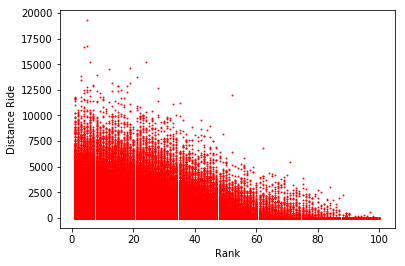

In [21]:
fig4 = train1.plot.scatter(x='team_placement', y='player_dist_ride', s=0.8, color='red')
fig4.set_xlabel("Rank")
fig4.set_ylabel("Distance Ride")

In [22]:
val = "null"
def SuccessFunc(df):
    if df['team_placement'] < 100 and df['team_placement'] >= 80:
        val = "5thQuarter"
    elif df['team_placement'] < 80 and df['team_placement'] >= 60:
        val = "4thQuarter"
    elif df['team_placement'] < 60 and df['team_placement'] >= 40:
        val = "3rdQuarter"
    elif df['team_placement'] < 40 and df['team_placement'] >= 20:
        val = "2ndQuarter"
    elif df['team_placement'] < 40 and df['team_placement'] >= 10:
        val = "1stQuarter"
    elif df['team_placement'] < 10 and df['team_placement'] >= 5:
        val = "Top10"
    elif df['team_placement'] < 5 and df['team_placement'] >= 2:
        val = "Top5"
    else:
        val = "Winner"
    
    return val

In [23]:
train['Success'] = train.apply(SuccessFunc, axis=1)
print(train.apply(SuccessFunc, axis=1))

C:\Users\fatih\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0         4thQuarter
1         5thQuarter
2         2ndQuarter
3         3rdQuarter
4         3rdQuarter
5         5thQuarter
6         2ndQuarter
7         3rdQuarter
8         4thQuarter
9         4thQuarter
10        2ndQuarter
11        4thQuarter
12        5thQuarter
13        3rdQuarter
14        5thQuarter
15        2ndQuarter
16        4thQuarter
17        3rdQuarter
18        4thQuarter
19        2ndQuarter
20            Winner
21        4thQuarter
22        4thQuarter
23        2ndQuarter
24        3rdQuarter
25        2ndQuarter
26        3rdQuarter
27        2ndQuarter
28        3rdQuarter
29        4thQuarter
             ...    
99984     3rdQuarter
99985     3rdQuarter
99986     5thQuarter
99987     2ndQuarter
99988         Winner
99989     4thQuarter
99990     3rdQuarter
99991     3rdQuarter
99992     4thQuarter
99993     4thQuarter
99994     2ndQuarter
99995     2ndQuarter
99996     5thQuarter
99997           Top5
99998     3rdQuarter
99999     5thQuarter
100000    3rd

In [24]:
test['Success'] = test.apply(SuccessFunc, axis=1)
print(test.apply(SuccessFunc, axis=1))

C:\Users\fatih\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


100014         Top10
100015    1stQuarter
100016    2ndQuarter
100017    4thQuarter
100018    5thQuarter
100019    1stQuarter
100020    2ndQuarter
100021    4thQuarter
100022    5thQuarter
100023    5thQuarter
100024    3rdQuarter
100025    3rdQuarter
100026    2ndQuarter
100027    5thQuarter
100028    3rdQuarter
100029    2ndQuarter
100030    3rdQuarter
100031    3rdQuarter
100032         Top10
100033    4thQuarter
100034    4thQuarter
100035    5thQuarter
100036    2ndQuarter
100037         Top10
100038    5thQuarter
100039    4thQuarter
100040    1stQuarter
100041    3rdQuarter
100042    4thQuarter
100043    4thQuarter
             ...    
119986    3rdQuarter
119987    4thQuarter
119988         Top10
119989    3rdQuarter
119990    1stQuarter
119991    4thQuarter
119992          Top5
119993    4thQuarter
119994    3rdQuarter
119995    1stQuarter
119996    4thQuarter
119997    3rdQuarter
119998    2ndQuarter
119999    2ndQuarter
120000    3rdQuarter
120001         Top10
120002    4th

In [25]:
test.head()

,player_assists,player_dist_ride,player_dist_walk,player_dmg,player_kills,player_name,player_survive_time,team_placement,Success
100014,0,1898.99316,4414.635000,239,2,Raymond0512,1637.775,8,Top10
100015,0,0.00000,3651.032470,0,0,biedawtiouxiang,1447.402,15,1stQuarter
100016,0,0.00000,3139.203860,168,2,SlippyDip,869.902,32,2ndQuarter
100017,0,0.00000,121.094025,0,0,M_bl_Jl_o,164.052,74,4thQuarter
100018,0,0.00000,0.000000,0,0,Ipocampo,874.838,90,5thQuarter


In [26]:
test = test.reset_index(drop=True)

Text(0,0.5,'Assists')

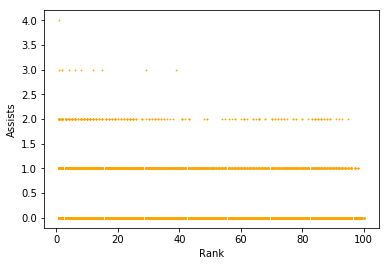

In [27]:
fig7 = train.plot.scatter(x='team_placement', y='player_assists', s= 0.6, color='orange')
fig7.set_xlabel("Rank")
fig7.set_ylabel("Assists")

In [28]:
from sklearn import tree
from sklearn.metrics import classification_report
X=train[["player_assists", "player_dist_walk", "player_dist_ride", "player_dmg", "player_kills"]]
Y=train[['Success']]
#Classifier = tree.DecisionTreeClassifier()
#Classifier = Classifier.fit(X,Y)

In [29]:
from sklearn import preprocessing

In [30]:
le = preprocessing.LabelEncoder()
le.fit(["5thQuarter", "4thQuarter", "3rdQuarter", "2ndQuarter", "1stQuarter", "Top10", "Top5", "Winner"])

LabelEncoder()

In [31]:
list(le.classes_)

['1stQuarter',
 '2ndQuarter',
 '3rdQuarter',
 '4thQuarter',
 '5thQuarter',
 'Top10',
 'Top5',
 'Winner']

In [32]:
Y = le.transform(train['Success'])

In [33]:
Classifier = tree.DecisionTreeClassifier()
Classifier = Classifier.fit(X,Y)

In [34]:
Classifier

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [35]:
testtyped = test
testtyped['Success'] = le.transform(testtyped['Success'])

In [36]:
testtyped

,player_assists,player_dist_ride,player_dist_walk,player_dmg,player_kills,player_name,player_survive_time,team_placement,Success
0,0,1898.99316,4414.635000,239,2,Raymond0512,1637.775,8,5
1,0,0.00000,3651.032470,0,0,biedawtiouxiang,1447.402,15,0
2,0,0.00000,3139.203860,168,2,SlippyDip,869.902,32,1
3,0,0.00000,121.094025,0,0,M_bl_Jl_o,164.052,74,3
4,0,0.00000,0.000000,0,0,Ipocampo,874.838,90,4
5,0,0.00000,4602.713380,114,2,Cong_x,1372.209,14,0
6,0,5203.53000,2258.094480,97,0,Slayer1583,1086.885,24,1
7,0,0.00000,115.197900,197,2,Cigarette_Kai,182.036,63,3
8,0,0.00000,0.000000,0,0,YUskinbaba,117.720,94,4
9,0,0.00000,1.092564,0,0,UongBi89,79.111,91,4


In [37]:
testin = testtyped[["player_assists", "player_dist_walk", "player_dist_ride", "player_dmg", "player_kills"]]
testreal = testtyped["Success"]

In [38]:
testresult = Classifier.predict(testin)

In [39]:
from sklearn.metrics import classification_report

In [40]:
targetnames = []
for i in range(0, 8):
    targetnames.append(le.inverse_transform(i))
targetnames

['1stQuarter',
 '2ndQuarter',
 '3rdQuarter',
 '4thQuarter',
 '5thQuarter',
 'Top10',
 'Top5',
 'Winner']

In [129]:
print(classification_report(testreal, testresult, target_names=targetnames))

             precision    recall  f1-score   support

 1stQuarter       0.32      0.32      0.32      2124
 2ndQuarter       0.47      0.46      0.47      4082
 3rdQuarter       0.52      0.51      0.52      4365
 4thQuarter       0.54      0.54      0.54      4293
 5thQuarter       0.67      0.71      0.69      3181
      Top10       0.20      0.20      0.20      1081
       Top5       0.20      0.21      0.21       653
     Winner       0.24      0.23      0.23       221

avg / total       0.49      0.49      0.49     20000



In [131]:
counter = 0
for i in range(0, 20000):
    if testreal.iloc[i] == testresult[i]:
        counter += 1

similarity1 = 100*(counter/20000)
print("Precision of Decision Tree: ", similarity1, "%")

Precision of Decision Tree:  48.655 %


In [127]:
#from sklearn.tree import export_graphviz


#export_graphviz(Classifier, out_file="mytree.dot")
#with open("mytree.dot") as f:
    #dot_graph = f.read()
#graphviz.Source(dot_graph)


In [43]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
ForestClassifier = RandomForestClassifier(n_estimators = 50)

In [67]:
ForestClassifier.fit(X, Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [68]:
forestresult = ForestClassifier.predict(testin)

In [69]:
forestresult

array([6, 5, 0, ..., 5, 1, 4], dtype=int64)

In [70]:
print(classification_report(testreal, forestresult, target_names=targetnames))

             precision    recall  f1-score   support

 1stQuarter       0.36      0.38      0.37      2124
 2ndQuarter       0.52      0.58      0.55      4082
 3rdQuarter       0.57      0.56      0.57      4365
 4thQuarter       0.57      0.57      0.57      4293
 5thQuarter       0.69      0.72      0.70      3181
      Top10       0.24      0.17      0.20      1081
       Top5       0.24      0.15      0.19       653
     Winner       0.38      0.30      0.33       221

avg / total       0.53      0.54      0.53     20000



In [132]:
counter = 0
for i in range(0, 20000):
    if testreal.iloc[i] == forestresult[i]:
        counter += 1

similarity2 = 100*(counter/20000)
print("Precision of Decision Tree: ", similarity, "%")

Precision of Decision Tree:  53.565 %


In [72]:
f_importances = ForestClassifier.feature_importances_

In [73]:
f_importances

array([ 0.00812191,  0.66089732,  0.14439204,  0.16001618,  0.02657255])

In [74]:
t_importances = Classifier.feature_importances_

In [75]:
t_importances

array([ 0.01079517,  0.68526772,  0.12152724,  0.15636679,  0.02604308])

In [116]:
importances = pd.DataFrame({'Technique': [],
                            'Player_Assists': [],
                            'Distance_Walked': [],
                            'Distance_Ride': [],
                            'Damage Given':[],
                            'Kills': []
                           })

slice1 = pd.DataFrame({ 'Technique': ["Decision Tree"],
                        'Player_Assists': [t_importances[0]],
                        'Distance_Walked': [t_importances[1]],
                        'Distance_Ride': [t_importances[2]],
                        'Damage Given':[t_importances[3]],
                        'Kills': [t_importances[4]]
                           })

slice2 = pd.DataFrame({ 'Technique': ["Random Forest"],
                        'Player_Assists': [f_importances[0]],
                        'Distance_Walked': [f_importances[1]],
                        'Distance_Ride': [f_importances[2]],
                        'Damage Given':[f_importances[3]],
                        'Kills': [f_importances[4]]
                           })

In [122]:
slice2

,Damage Given,Distance_Ride,Distance_Walked,Kills,Player_Assists,Technique
0,0.160016,0.144392,0.660897,0.026573,0.008122,Random Forest


In [124]:
importances = importances.append(slice1)
importances = importances.append(slice2)

In [125]:
importances

,Damage Given,Distance_Ride,Distance_Walked,Kills,Player_Assists,Technique
0,0.156367,0.121527,0.685268,0.026043,0.010795,Decision Tree
0,0.160016,0.144392,0.660897,0.026573,0.008122,Random Forest


In [133]:
similarities = [similarity1, similarity2]
similarities

[48.655, 53.565]

ValueError: shape mismatch: objects cannot be broadcast to a single shape

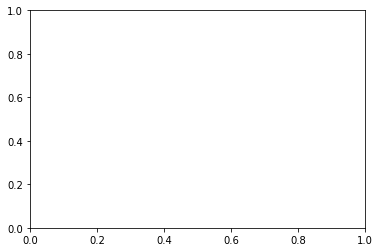

In [151]:
dictionary = plt.figure()

D = {u'LabelDecisionTree':similarities[0], u'LabelRandomForest': similarities[1]}
plt.bar(range(0,100), D.values(), align='center')
plt.xticks(range(len(D)), D.keys())


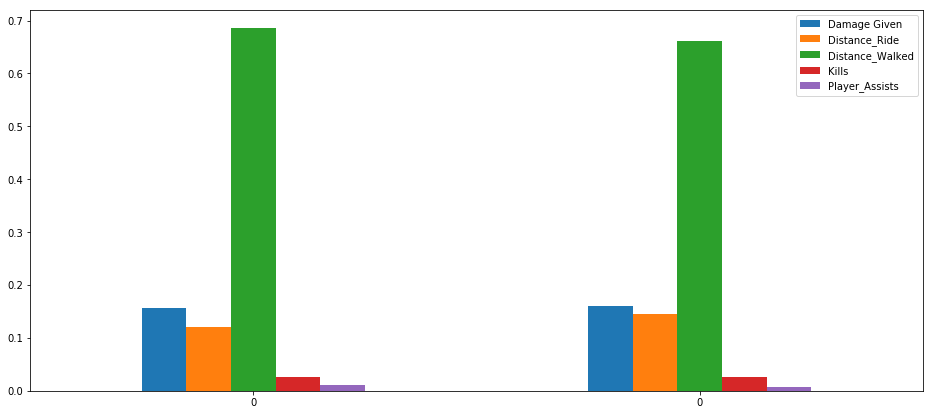

In [159]:
importances.set_index('Technique')
importances.plot(kind="bar",figsize=(16,7),rot=0)

In [173]:
importances.set_index('Technique')

,Damage Given,Distance_Ride,Distance_Walked,Kills,Player_Assists
Technique,,,,,
Decision Tree,0.156367,0.121527,0.685268,0.026043,0.010795
Random Forest,0.160016,0.144392,0.660897,0.026573,0.008122


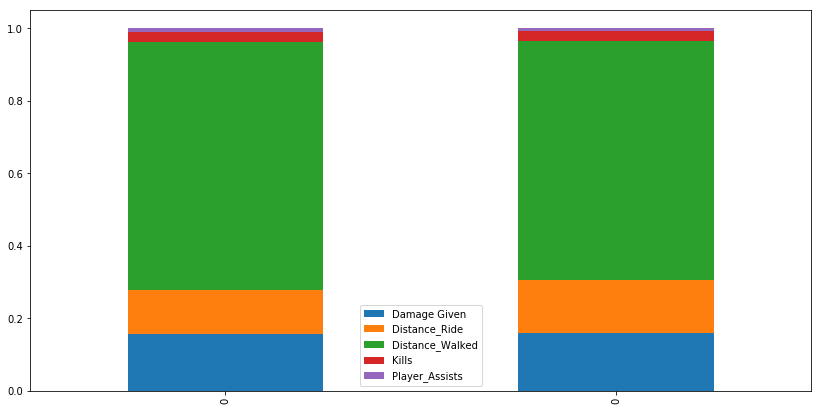

In [182]:
ticks = ("Decision Tree", "Random Forest")
importances.plot(kind="bar",figsize=(14,7),stacked=True)

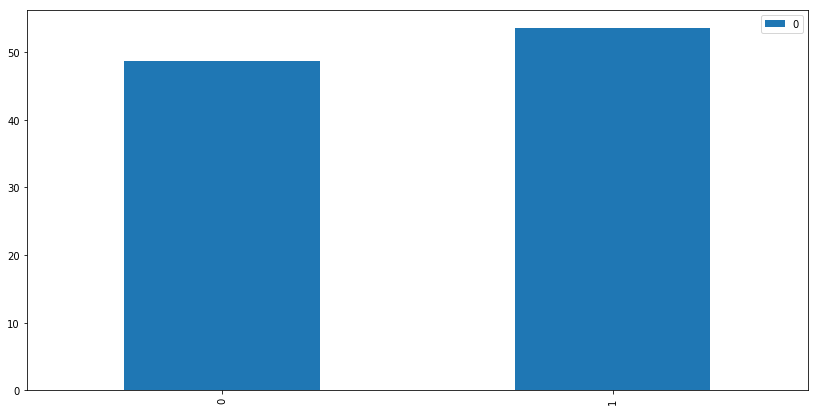

In [185]:
similarities1 = pd.DataFrame(data=similarities)
similarities1.plot(kind="bar",figsize=(14,7))